<a href="https://colab.research.google.com/github/cvvarun12/Data-analytics-with-python/blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **Libraries** **& Load Data**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder



In [2]:
# Load the dataset
from google.colab import files
uploaded =files.upload()

Saving Housing.xlsx to Housing.xlsx


In [4]:
df=pd.read_excel("Housing.xlsx")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Data** **Exploration**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

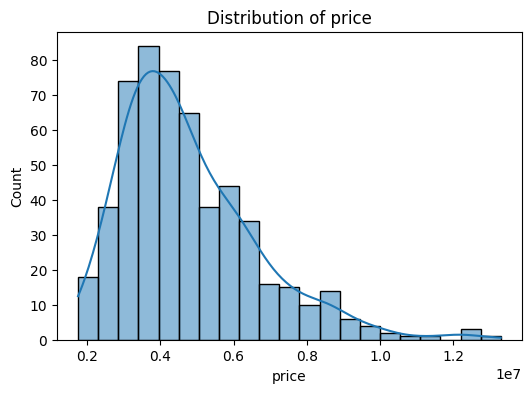

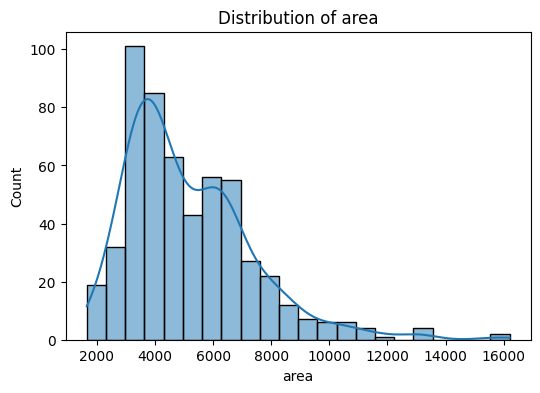

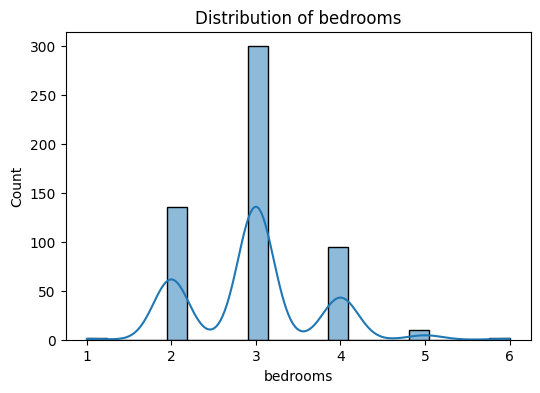

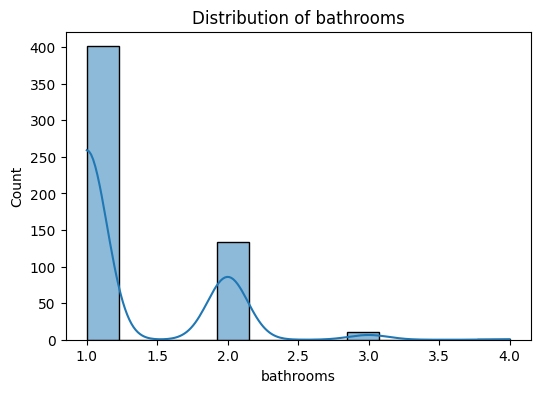

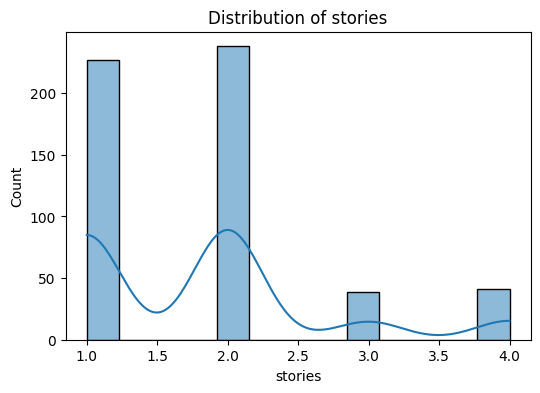

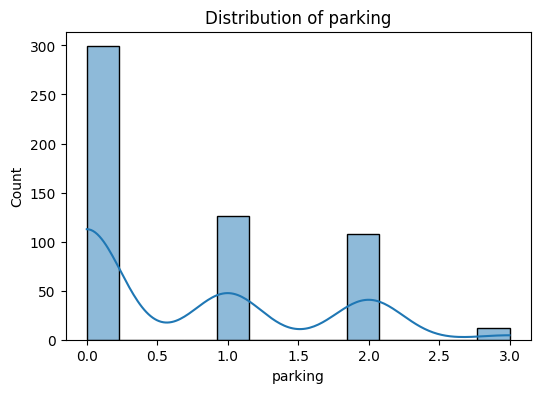

In [5]:
# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Visualize distributions
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# **Outlier** **Detection**

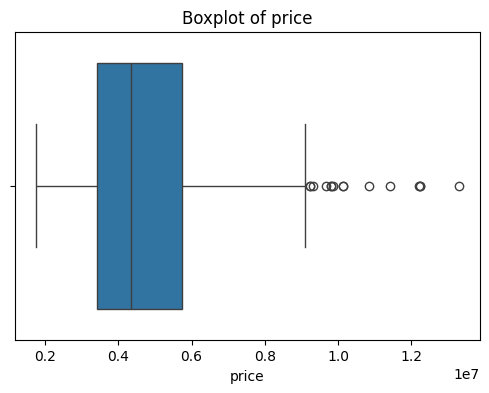

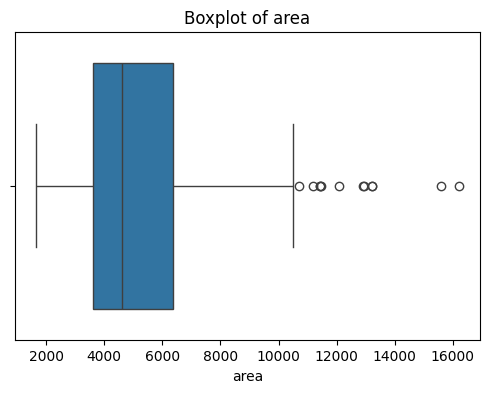

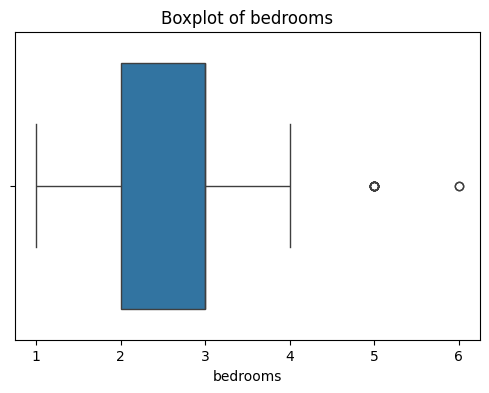

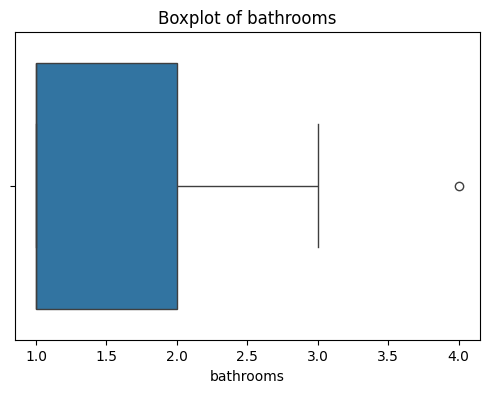

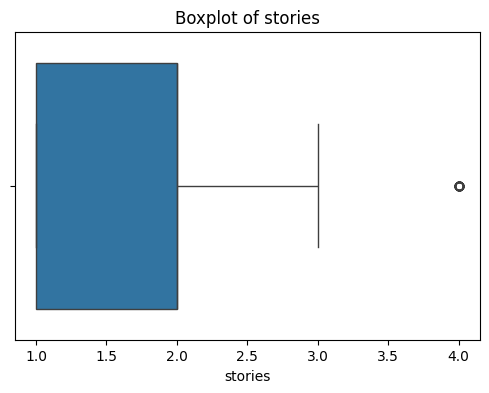

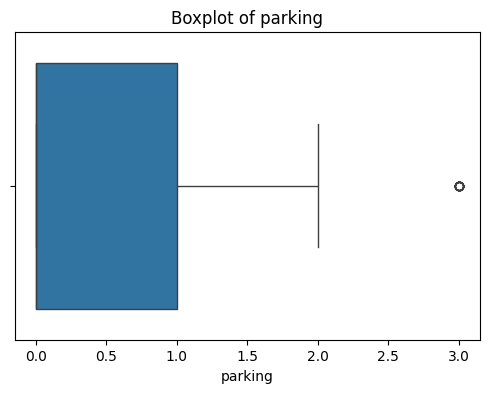

In [6]:
# Boxplots to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# **Data** **Preprocessing**

In [7]:
# Encode categorical Yes/No as 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# One-Hot Encoding for 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

df.head()

<ipython-input-7-2533865857be>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,False,False


# **Feature** **Selection** **with** **Correlation**

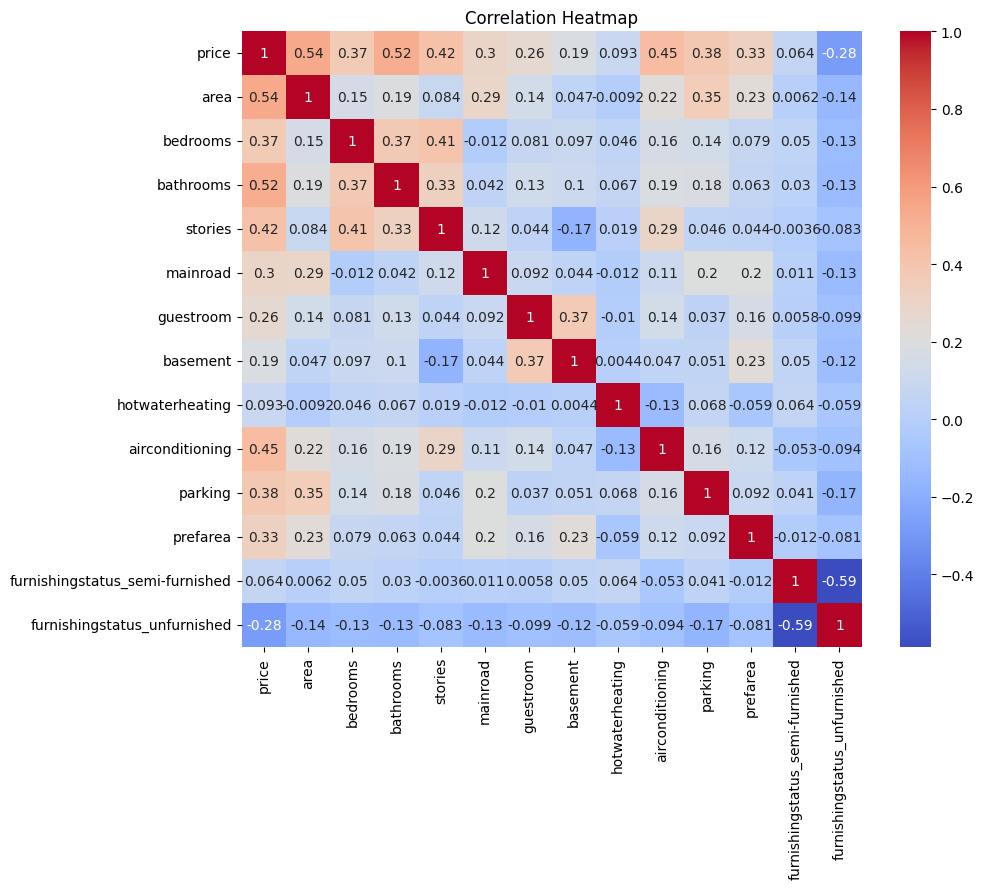

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Model** **Training**

In [9]:
# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Model** **Evaluation**

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Square Error (RMSE): 1324506.96
R² Score: 0.6529


# **Predicted** **vs** **Actual** **Prices**

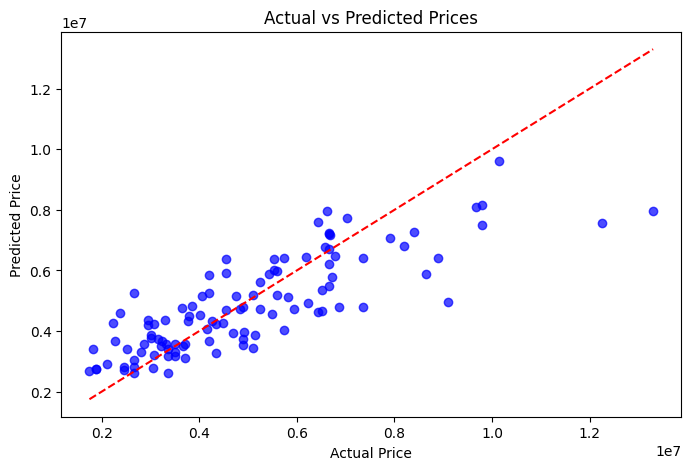

In [11]:
# Comparison plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

# **Feature** **Importance**

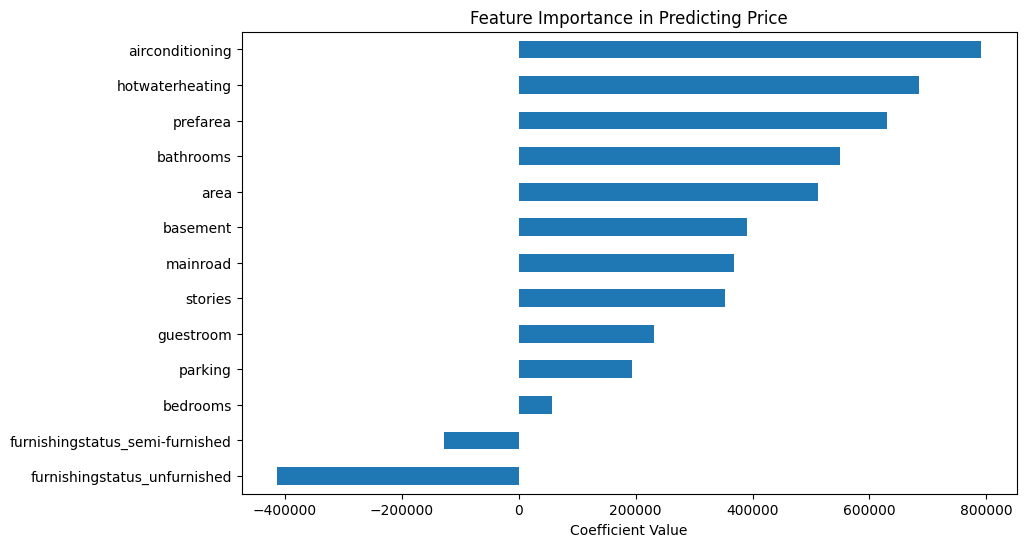

airconditioning                    791426.735843
hotwaterheating                    684649.885339
prefarea                           629890.565313
bathrooms                          549420.501241
area                               511615.563777
basement                           390251.176181
mainroad                           367919.947680
stories                            353158.429856
guestroom                          231610.037176
parking                            193542.781675
bedrooms                            56615.572458
furnishingstatus_semi-furnished   -126881.817585
furnishingstatus_unfurnished      -413645.062228
dtype: float64


In [12]:
# Feature importance (coefficients)
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance in Predicting Price")
plt.xlabel("Coefficient Value")
plt.show()

# Display the coefficients
print(importance.sort_values(ascending=False))